Import libraries

In [1]:
import requests
import time
import pandas as pd

In [2]:
url = 'https://www.reddit.com/r/relationship_advice.json'

Set a username so Reddit knows I'm not a hacker.

In [3]:
headers = {"User-agent": "not-robot-rachel"}

In [4]:
res = requests.get(url, headers=headers)

Check for a good status code.  Should be 200.

In [5]:
res.status_code

200

In [6]:
the_json = res.json()

In [7]:
sorted(the_json.keys())

['data', 'kind']

In [8]:
the_json['kind']

'Listing'

In [9]:
sorted(the_json['data'].keys())

['after', 'before', 'children', 'dist', 'modhash']

In [10]:
len(the_json['data']['children'])

26

In [11]:
the_json['data']['children'][0]['data']

{'approved_at_utc': None,
 'subreddit': 'relationship_advice',
 'selftext': 'Since two or three times a week we end up removing a few threads on why everyone keeps suggesting breakups, rather than micromanage the community, we figured this post would be prudent:\n\nYou know how every Uber rating is right on the verge of 5 stars unless something\'s particularly off? Everyone\'s all "A+++ WOULD RIDE AGAIN." Same for eBay, Amazon, etc.\n\nWell, think of /r/relationship_advice comments as much the same, only inverted. Two things to always keep in mind:\n\n1. The vast majority of people posting here are posting because they\'ve got a challenge they probably haven\'t been able to resolve on their own. \n\n2. In many cases, these challenges are insurmountable (or just exceedingly difficult to deal with). \n\n**The majority of commenters aren\'t *necessarily* cynical/assholes, but combine both a one-sided account of what happened—your account—with each commenter\'s own potential history, griev

In [12]:
pd.DataFrame(the_json['data']['children']).head()

,data,kind
0,"{'approved_at_utc': None, 'subreddit': 'relati...",t3
1,"{'approved_at_utc': None, 'subreddit': 'relati...",t3
2,"{'approved_at_utc': None, 'subreddit': 'relati...",t3
3,"{'approved_at_utc': None, 'subreddit': 'relati...",t3
4,"{'approved_at_utc': None, 'subreddit': 'relati...",t3


In [13]:
the_json['data']['after']
#should match up to the last line of the below 

't3_cc04vi'

In [14]:
[post['data']['name'] for post in the_json['data']['children']]

['t3_b2nc2f',
 't3_cbtqgv',
 't3_cbvlx4',
 't3_cbqd4j',
 't3_cbvrya',
 't3_cbrwp1',
 't3_cbwczp',
 't3_cbot23',
 't3_cbxwxw',
 't3_cbvml1',
 't3_cbijp0',
 't3_cbx3dw',
 't3_cbo5ed',
 't3_cbzq22',
 't3_cblyj6',
 't3_cc0a2n',
 't3_cc0ffk',
 't3_cbrxsm',
 't3_cby62s',
 't3_cbx6uj',
 't3_cbnlhd',
 't3_cbvsp7',
 't3_cbj5gs',
 't3_cbrylb',
 't3_cbv7yg',
 't3_cc04vi']

In [15]:
 params = {'after': 't3_ca56fk'}  #from July 6

In [16]:
#param = {'after': 't3_c8pr2s'}

In [17]:
requests.get(url, params=params, headers=headers)

<Response [200]>

Let's scrape some posts! 

In [18]:
posts = []
after = None
for i in range(40):
    print(i)
    if after == None:
        params= {}
    else:
        params = {'after': after}
    url = "https://www.reddit.com/r/relationship_advice.json"  # July 6 
    res = requests.get(url, params=params, headers=headers) # July 6 
    if res.status_code == 200:
        the_json = res.json()
        
       # posts.extend(the_json['data']['children'])
        for post in the_json['data']['children']:
            posts.append(post['data'])
        after = the_json['data']['after']
    else:
        print(res.status_code)
        break
        
    
    print('Current Scrape:')
    print(f"{len(the_json['data']['children'])} posts scraped for a total of {len(posts)}")
    print(f"Current after:{after}")
    time.sleep(1)
        
#adapted from lecture notes code    

0
Current Scrape:
26 posts scraped for a total of 26
Current after:t3_cc04vi
1
Current Scrape:
25 posts scraped for a total of 51
Current after:t3_cbyxue
2
Current Scrape:
25 posts scraped for a total of 76
Current after:t3_cc15nm
3
Current Scrape:
25 posts scraped for a total of 101
Current after:t3_cbyoyd
4
Current Scrape:
25 posts scraped for a total of 126
Current after:t3_cbrpd1
5
Current Scrape:
25 posts scraped for a total of 151
Current after:t3_cc1ilj
6
Current Scrape:
25 posts scraped for a total of 176
Current after:t3_cc19jr
7
Current Scrape:
25 posts scraped for a total of 201
Current after:t3_cby0e2
8
Current Scrape:
25 posts scraped for a total of 226
Current after:t3_cc0pf5
9
Current Scrape:
25 posts scraped for a total of 251
Current after:t3_cc0avn
10
Current Scrape:
25 posts scraped for a total of 276
Current after:t3_cbww0k
11
Current Scrape:
25 posts scraped for a total of 301
Current after:t3_cbzfd1
12
Current Scrape:
25 posts scraped for a total of 326
Current af

In [19]:
len(posts)

981

In [20]:
#July 6 scrape
df = pd.DataFrame(posts)
df[['author', 'title', 'selftext']]

,author,title,selftext
0,eganist,[meta] Think of the comments as an inverted Ub...,Since two or three times a week we end up remo...
1,HerrVolksdeutsche,UPDATE My (29m) girlfriend (24f) cancelled wee...,Update to \[this\]( [https://www.reddit.com/r/...
2,marilyjen65,Am I wrong to be annoyed with my husband for w...,Every single damn morning before he leaves to ...
3,throwaway19961111,I (m 31) am growing tired of my wife’s (f 31) ...,"Ive been with my wife for about 15 years, if y..."
4,heyhoitsmeeeee,Another update: I hate being touched by my hus...,Hey y’all. I have no idea why reddit keeps del...
5,Unsureaboutthis9,Girlfriend doesn’t want to sign a prenup,"To make a long story short, I love my girlfrie..."
6,RosieNApot,Husband kicked out pregnant wife,We have a lot going on right now. We have 2 ki...
7,HerrVolksdeutsche,My (29m) girlfriend (24f) cancelled weekend pl...,Last weekend I had arranged a week in advance ...
8,anonadvice993,Boyfriend not attracted to me because I gained...,"Title is pretty much the story, throwaway beca..."
9,Cappitycappity,Girlfriend [F25] calling my [M25] instagram fo...,So my girlfriend has a lot of difficulty trust...


In [21]:
df.shape

(981, 98)

In [22]:
df.dtypes.head()

all_awardings          object
allow_live_comments      bool
approved_at_utc        object
approved_by            object
archived                 bool
dtype: object

In [23]:
df.columns

Index(['all_awardings', 'allow_live_comments', 'approved_at_utc',
       'approved_by', 'archived', 'author', 'author_cakeday',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'banned_at_utc', 'banned_by',
       'can_gild', 'can_mod_post', 'category', 'clicked', 'content_categories',
       'contest_mode', 'created', 'created_utc', 'crosspost_parent',
       'crosspost_parent_list', 'discussion_type', 'distinguished', 'domain',
       'downs', 'edited', 'gilded', 'gildings', 'hidden', 'hide_score', 'id',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'likes', 'link_flair_background_color', 'link_flair_css_class',
       'link_flair_richtext', 'link_flair_text', 'link_flair_text_color',
 

In [24]:
df['id'].value_counts()

cbwd80    1
cbtcd2    1
cbu1fs    1
cc1ad9    1
cc0caa    1
cbud2m    1
cbwczp    1
cbp80w    1
cbrwjr    1
cbys4g    1
cbswza    1
cbtg0o    1
cbx0l7    1
cbwe0l    1
cbldv0    1
cbzlno    1
cbq5ct    1
cbvlds    1
cbryut    1
cc18zq    1
cbz59p    1
cbsihv    1
cc13ts    1
cbxplk    1
cbsmny    1
cbwyvv    1
cbr0qu    1
cbhtha    1
cbqmjt    1
cc0tlp    1
         ..
cbtk4l    1
cbwar8    1
cbz526    1
cbs8pj    1
cbvm3c    1
cbt9dr    1
cbzivd    1
cbvww7    1
cbpowh    1
cbgefn    1
cbpn7p    1
cbtmwx    1
cbsk8g    1
cbxxm8    1
cbo5ed    1
cbtkdz    1
cbu2lp    1
cbp1lo    1
cbr79n    1
cba218    1
cb6kyh    1
cbr5mn    1
cc1hol    1
cbrwp1    1
cbz5m1    1
cbuw8q    1
cbor45    1
cbr1hc    1
cbre1b    1
cc0hsl    1
Name: id, Length: 981, dtype: int64

In [25]:
df['created_utc'].head()

0    1.552939e+09
1    1.562838e+09
2    1.562851e+09
3    1.562814e+09
4    1.562852e+09
Name: created_utc, dtype: float64

Convert column with time created information to be more readable.

In [26]:
df['timestamp'] = pd.to_datetime(df['created_utc'], unit='s')

In [27]:
df['timestamp'].head()

0   2019-03-18 20:04:08
1   2019-07-11 09:38:28
2   2019-07-11 13:16:58
3   2019-07-11 02:56:20
4   2019-07-11 13:37:18
Name: timestamp, dtype: datetime64[ns]

In [28]:
df['subreddit'].unique()

array(['relationship_advice'], dtype=object)

Make a new DataFrame with only the columns I think are important.  
See data dictionary for details.

In [29]:
relationship = df[['id', 'author', 'title', 'selftext', 
                   'timestamp', 'num_comments', 'ups', 'subreddit']]

In [30]:
relationship.shape

(981, 8)

In [31]:
relationship

,id,author,title,selftext,timestamp,num_comments,ups,subreddit
0,b2nc2f,eganist,[meta] Think of the comments as an inverted Ub...,Since two or three times a week we end up remo...,2019-03-18 20:04:08,52,3276,relationship_advice
1,cbtqgv,HerrVolksdeutsche,UPDATE My (29m) girlfriend (24f) cancelled wee...,Update to \[this\]( [https://www.reddit.com/r/...,2019-07-11 09:38:28,803,7889,relationship_advice
2,cbvlx4,marilyjen65,Am I wrong to be annoyed with my husband for w...,Every single damn morning before he leaves to ...,2019-07-11 13:16:58,376,764,relationship_advice
3,cbqd4j,throwaway19961111,I (m 31) am growing tired of my wife’s (f 31) ...,"Ive been with my wife for about 15 years, if y...",2019-07-11 02:56:20,1819,8838,relationship_advice
4,cbvrya,heyhoitsmeeeee,Another update: I hate being touched by my hus...,Hey y’all. I have no idea why reddit keeps del...,2019-07-11 13:37:18,192,492,relationship_advice
5,cbrwp1,Unsureaboutthis9,Girlfriend doesn’t want to sign a prenup,"To make a long story short, I love my girlfrie...",2019-07-11 05:42:52,952,2213,relationship_advice
6,cbwczp,RosieNApot,Husband kicked out pregnant wife,We have a lot going on right now. We have 2 ki...,2019-07-11 14:42:37,148,161,relationship_advice
7,cbot23,HerrVolksdeutsche,My (29m) girlfriend (24f) cancelled weekend pl...,Last weekend I had arranged a week in advance ...,2019-07-11 00:27:11,225,1385,relationship_advice
8,cbxwxw,anonadvice993,Boyfriend not attracted to me because I gained...,"Title is pretty much the story, throwaway beca...",2019-07-11 16:45:07,95,66,relationship_advice
9,cbvml1,Cappitycappity,Girlfriend [F25] calling my [M25] instagram fo...,So my girlfriend has a lot of difficulty trust...,2019-07-11 13:19:34,85,100,relationship_advice


In [32]:
relationship.head()

,id,author,title,selftext,timestamp,num_comments,ups,subreddit
0,b2nc2f,eganist,[meta] Think of the comments as an inverted Ub...,Since two or three times a week we end up remo...,2019-03-18 20:04:08,52,3276,relationship_advice
1,cbtqgv,HerrVolksdeutsche,UPDATE My (29m) girlfriend (24f) cancelled wee...,Update to \[this\]( [https://www.reddit.com/r/...,2019-07-11 09:38:28,803,7889,relationship_advice
2,cbvlx4,marilyjen65,Am I wrong to be annoyed with my husband for w...,Every single damn morning before he leaves to ...,2019-07-11 13:16:58,376,764,relationship_advice
3,cbqd4j,throwaway19961111,I (m 31) am growing tired of my wife’s (f 31) ...,"Ive been with my wife for about 15 years, if y...",2019-07-11 02:56:20,1819,8838,relationship_advice
4,cbvrya,heyhoitsmeeeee,Another update: I hate being touched by my hus...,Hey y’all. I have no idea why reddit keeps del...,2019-07-11 13:37:18,192,492,relationship_advice


In [33]:
%ls

README.md                         dating-advice-scrape.ipynb
Requirements.txt                  reddit-NLP.ipynb
Vader.ipynb                       relationship-advice-scrape.ipynb
datasets/


In [34]:
# commented out so I don't acccidentally override original save when rerunning notebook
# relationship.to_csv('relationship.csv')

In [35]:
pd.read_csv('datasets/relationship.csv')

,Unnamed: 0,id,author,title,selftext,timestamp,num_comments,ups,subreddit
0,0,b2nc2f,eganist,[meta] Think of the comments as an inverted Ub...,Since two or three times a week we end up remo...,2019-03-18 20:04:08,52,3153,relationship_advice
1,1,ca66sv,throwawaynocollege01,"Mom had an affair 18 years ago, I [18M] am the...",Pretty much the title. I have no idea how to p...,2019-07-07 12:13:03,5732,21144,relationship_advice
2,2,c9ztfk,thegoodtwin28,UPDATE: I'm thinking of distancing myself from...,Thank you for all the helpful comments.\n\nA l...,2019-07-06 22:52:54,620,8427,relationship_advice
3,3,ca62qi,bigkyrososa,General Advice: You Don't Require Evidence/Con...,Just some general relationship advice after ob...,2019-07-07 11:58:29,39,202,relationship_advice
4,4,ca8eih,grizzythekid,I just found out that my daughter is not my da...,So my SO of 4+ years just confessed that my da...,2019-07-07 16:03:19,83,69,relationship_advice
5,5,ca1g45,Prokkkk,UPDATE: Partner of 5 years asked me to be in a...,Original Post: https://reddit.app.link/ZQ55Qqq...,2019-07-07 01:39:43,161,724,relationship_advice
6,6,c9xveg,ozzymomo123,[UPDATE] Me [18M] and 9 other friends [18M] on...,"Okay so I listened to everyone who commented, ...",2019-07-06 19:56:02,392,2042,relationship_advice
7,7,ca5bvw,anonymous_throaway22,Update: I [23F] just found out my husband [38M...,"For those of you that were curious, I reached ...",2019-07-07 10:12:10,29,92,relationship_advice
8,8,c9tyyk,A2v19,Girlfriend of 3 years just came out as asexual,My girlfriend that I live with and have been w...,2019-07-06 14:09:10,778,5046,relationship_advice
9,9,ca5r9i,Autumnisbestimo,Married 10 years and I think my wife regrets i...,How crazy am I to be posting this to a public ...,2019-07-07 11:14:34,29,72,relationship_advice


In [36]:
#test
relationship[relationship['id'] == "ca6qfy"]

,id,author,title,selftext,timestamp,num_comments,ups,subreddit


In [37]:
relationship['selftext'][0]

'Since two or three times a week we end up removing a few threads on why everyone keeps suggesting breakups, rather than micromanage the community, we figured this post would be prudent:\n\nYou know how every Uber rating is right on the verge of 5 stars unless something\'s particularly off? Everyone\'s all "A+++ WOULD RIDE AGAIN." Same for eBay, Amazon, etc.\n\nWell, think of /r/relationship_advice comments as much the same, only inverted. Two things to always keep in mind:\n\n1. The vast majority of people posting here are posting because they\'ve got a challenge they probably haven\'t been able to resolve on their own. \n\n2. In many cases, these challenges are insurmountable (or just exceedingly difficult to deal with). \n\n**The majority of commenters aren\'t *necessarily* cynical/assholes, but combine both a one-sided account of what happened—your account—with each commenter\'s own potential history, grievances, etc., and the resulting brew is pretty dark,** meaning that every pos

In [38]:
relationship.shape

(981, 8)

2nd scrape 

In [39]:
#July 8 scrape
new_url = "https://www.reddit.com/r/relationship_advice/new.json"

In [40]:
new_res = requests.get(new_url, headers=headers)

In [41]:
new_res.status_code

200

In [42]:
new_json = new_res.json()

In [43]:
pd.DataFrame(new_json['data']['children']).head()

,data,kind
0,"{'approved_at_utc': None, 'subreddit': 'relati...",t3
1,"{'approved_at_utc': None, 'subreddit': 'relati...",t3
2,"{'approved_at_utc': None, 'subreddit': 'relati...",t3
3,"{'approved_at_utc': None, 'subreddit': 'relati...",t3
4,"{'approved_at_utc': None, 'subreddit': 'relati...",t3


In [44]:
new_json['data']['after']

[post['data']['name'] for post in new_json['data']['children']]

['t3_cc1r1w',
 't3_cc1r0j',
 't3_cc1q75',
 't3_cc1n95',
 't3_cc1mw8',
 't3_cc1lzr',
 't3_cc1k2i',
 't3_cc1k29',
 't3_cc1jt2',
 't3_cc1j5i',
 't3_cc1ir3',
 't3_cc1ilj',
 't3_cc1hzo',
 't3_cc1hus',
 't3_cc1hom',
 't3_cc1hol',
 't3_cc1gj7',
 't3_cc1gat',
 't3_cc1g0y',
 't3_cc1esi',
 't3_cc1ems',
 't3_cc1ed8',
 't3_cc1dmx',
 't3_cc1dc4',
 't3_cc1d0m']

In [45]:
param = {'after': 't3_cao9wc'}  #July 8

In [46]:
new_posts = []
after = None
for i in range(40):
    print(i)
    if after == None:
        params= {}
    else:
        params = {'after': after}
    new_url = "https://www.reddit.com/r/relationship_advice/new.json"
    new_res = requests.get(new_url, params=params, headers=headers)
    if new_res.status_code == 200:
        new_json = new_res.json()
        
        for post in new_json['data']['children']:
            new_posts.append(post['data'])
        after = new_json['data']['after']
    else:
        print(new_res.status_code)
        break
        
    
    print('Current Scrape:')
    print(f"{len(new_json['data']['children'])} posts scraped for a total of {len(new_posts)}")
    print(f"Current after:{after}")
    time.sleep(1)
        
    

0
Current Scrape:
25 posts scraped for a total of 25
Current after:t3_cc1d0m
1
Current Scrape:
25 posts scraped for a total of 50
Current after:t3_cc11fd
2
Current Scrape:
25 posts scraped for a total of 75
Current after:t3_cc0qkp
3
Current Scrape:
25 posts scraped for a total of 100
Current after:t3_cc0cf8
4
Current Scrape:
25 posts scraped for a total of 125
Current after:t3_cbzyk0
5
Current Scrape:
25 posts scraped for a total of 150
Current after:t3_cbzgwr
6
Current Scrape:
25 posts scraped for a total of 175
Current after:t3_cbz1xw
7
Current Scrape:
25 posts scraped for a total of 200
Current after:t3_cbymqq
8
Current Scrape:
25 posts scraped for a total of 225
Current after:t3_cbyb0r
9
Current Scrape:
25 posts scraped for a total of 250
Current after:t3_cbxxm8
10
Current Scrape:
25 posts scraped for a total of 275
Current after:t3_cbxk51
11
Current Scrape:
25 posts scraped for a total of 300
Current after:t3_cbx215
12
Current Scrape:
25 posts scraped for a total of 325
Current af

In [47]:
new_df = pd.DataFrame(new_posts)
new_df[['author', 'title', 'selftext']].head()

,author,title,selftext
0,that_one_88,Update on how to tell if a relationship has co...,"So I didn’t get very many replies, but it was ..."
1,summerstillcalling,My (m 32) gf (30) wants me to get rid of my ca...,I have had my cat since I was 25 and I am not ...
2,timeitwas,My (23F) boyfriend (30M) didn't break up with ...,"So, this has been an ongoing thing for the las..."
3,ak47fua11,Lonley teen who needs love,Last year I finished school and Oates of going...
4,dEdzilla,Last night I [26/M] did something terrible [23...,Longish post sorry. No tldr. Hi. I need help. ...


In [48]:
new_df['id'].value_counts()

cbvoby    1
cbx0l7    1
cbncim    1
cbyemu    1
cc0tlp    1
cbqkdz    1
cbut1i    1
cc18zq    1
cbud2m    1
cbtnvs    1
cbp80w    1
cbrwjr    1
cbys4g    1
cbswza    1
cbtg0o    1
cbobh3    1
cby2pc    1
cbwe0l    1
cbzlno    1
cbq5ct    1
cbvlds    1
cbryut    1
cbz59p    1
cbsihv    1
cbr2ai    1
cc1ilj    1
cbxplk    1
cbsmny    1
cbxtjh    1
cbr0qu    1
         ..
cbngdh    1
cbsisq    1
cbs8pj    1
cbvm3c    1
cbt9dr    1
cbzivd    1
cbvww7    1
cbpowh    1
cbosq2    1
cbpn7p    1
cbtmwx    1
cbsk8g    1
cbxxm8    1
cbo83b    1
cbz526    1
cbtkdz    1
cbp1lo    1
cbr79n    1
cbr5mn    1
cbv5bq    1
cbrwp1    1
cbz5m1    1
cbndw0    1
cbuw8q    1
cbor45    1
cc03kx    1
cbu2lp    1
cbwar8    1
cbtk4l    1
cc0hsl    1
Name: id, Length: 993, dtype: int64

In [49]:
new_df['timestamp'] = pd.to_datetime(new_df['created_utc'], unit='s')

In [50]:
relationship_2 = new_df[['id', 'author', 'title', 'selftext', 
                   'timestamp', 'num_comments', 'ups', 'subreddit']]
relationship_2.head()

,id,author,title,selftext,timestamp,num_comments,ups,subreddit
0,cc1r1w,that_one_88,Update on how to tell if a relationship has co...,"So I didn’t get very many replies, but it was ...",2019-07-11 21:40:07,0,1,relationship_advice
1,cc1r0j,summerstillcalling,My (m 32) gf (30) wants me to get rid of my ca...,I have had my cat since I was 25 and I am not ...,2019-07-11 21:40:02,0,1,relationship_advice
2,cc1q75,timeitwas,My (23F) boyfriend (30M) didn't break up with ...,"So, this has been an ongoing thing for the las...",2019-07-11 21:38:11,0,1,relationship_advice
3,cc1n95,ak47fua11,Lonley teen who needs love,Last year I finished school and Oates of going...,2019-07-11 21:31:34,1,1,relationship_advice
4,cc1mw8,dEdzilla,Last night I [26/M] did something terrible [23...,Longish post sorry. No tldr. Hi. I need help. ...,2019-07-11 21:30:45,5,1,relationship_advice


Save to a csv.

In [51]:
# relationship_2.to_csv('datasets/more_relationship.csv') 
# commenting out cell so original save is not overwritten by a new scrape 
# when notebook is rerun.

In [52]:
more_relat = pd.read_csv('datasets/more_relationship.csv')
more_relat.shape

(999, 9)

In [53]:
more_relat.isnull().sum()

Unnamed: 0      0
id              0
author          0
title           0
selftext        5
timestamp       0
num_comments    0
ups             0
subreddit       0
dtype: int64

In [54]:
more_relat.dropna(inplace=True)

imports

In [55]:
from nltk.tokenize import RegexpTokenizer 
from sklearn.feature_extraction.text import CountVectorizer

Instantiate Tokenizer

In [56]:
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')

Tokenize the `title` and `selftext` columns.

In [57]:
more_relat['token_titles'] = more_relat['title'].apply(tokenizer.tokenize)

In [58]:
more_relat['token_text'] = more_relat['selftext'].apply(tokenizer.tokenize)

Find total number of words in all titles combined and all title lengths.

In [59]:
title_words = [word for tokens in more_relat["token_titles"] for word in tokens]
title_length = [len(title) for title in more_relat['token_titles']]

VOCAB = sorted(list(set(title_words)))
print(f'There are {len(title_words)} words total in the titles, with {len(VOCAB)} unique words.')
print(f"Max title length is {max(title_length)} words.")


There are 15215 words total in the titles, with 2734 unique words.
Max title length is 66 words.


Plot distribution of title lengths.

In [60]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6)) 
plt.xlabel('Title length')
plt.ylabel('Number of titles')
plt.hist(title_length)

mean = sum(title_length)/more_relat.shape[0]
plt.axvline(mean, color='r', linestyle='--')
plt.title('Distribution of relationship advice title lengths', fontsize=24)
plt.show()

<Figure size 800x600 with 1 Axes>

The average length of a title on the relationship advice subreddit is 15 words. 

Finding total words in all relationship advice posts and word lengths.

In [61]:
post_words = [word for tokens in more_relat["token_text"] for word in tokens]
post_length = [len(title) for title in more_relat['token_text']]
VOCAB = sorted(list(set(post_words)))

print(f'There are {len(post_words)} words total in the relationship advice posts, with {len(VOCAB)} unique words.')
print(f"Max post length is {max(post_length)} words.")

There are 423085 words total in the relationship advice posts, with 14338 unique words.
Max post length is 4216 words.


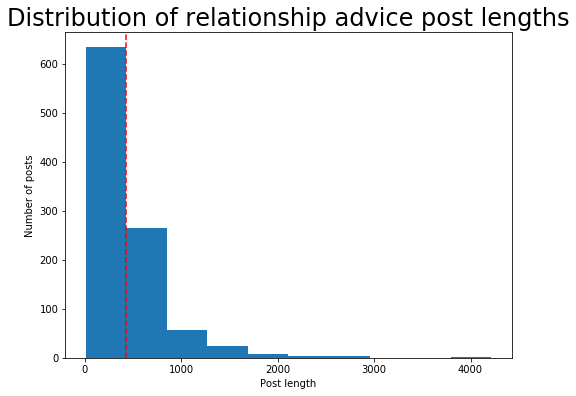

In [62]:
fig = plt.figure(figsize=(8, 6)) 
plt.xlabel('Post length')
plt.ylabel('Number of posts')
plt.hist(post_length)

mean_words = sum(post_length)/more_relat.shape[0]
plt.axvline(mean_words, color='r', linestyle='--')
plt.title('Distribution of relationship advice post lengths', fontsize=24)
plt.show();

The average word length of a relationship advice post is 425 words.

Check descriptive statistics.

In [63]:
more_relat.describe()

,Unnamed: 0,num_comments,ups
count,994.000000,994.000000,994.000000
mean,498.580483,11.286720,15.783702
std,288.707503,79.385412,240.133524
min,0.000000,0.000000,0.000000
25%,249.250000,2.000000,1.000000
50%,498.500000,5.000000,1.000000
75%,747.750000,9.000000,2.000000
max,998.000000,2440.000000,7046.000000


In [64]:
def get_top_n_words(corpus, n=None):
    cvec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = cvec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [66]:
common_titles = get_top_n_words(more_relat['title'], 20)
for word, freq in common_titles:
    print(word, freq)

relationship 123
girlfriend 112
boyfriend 111
know 85
friend 84
don 84
want 63
gf 60
help 54
ex 53
girl 49
just 46
like 44
feel 43
advice 42
years 42
friends 41
bf 40
best 39
love 39


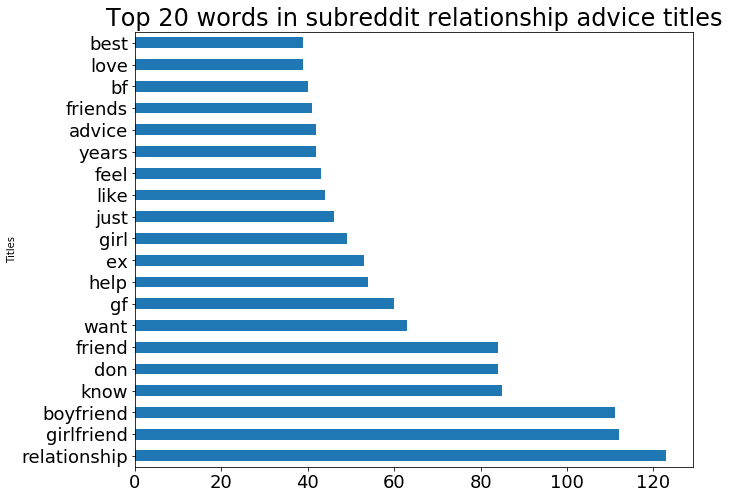

In [67]:
df_titles = pd.DataFrame(common_titles, columns=['Titles', 'count'])
plt.figure(figsize=(10,8))
df_titles.groupby('Titles').sum()['count'].sort_values(ascending=False).plot(kind='barh', fontsize=18)
plt.title("Top 20 words in subreddit relationship advice titles", fontsize=24);
#code apatded from: https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a

In [68]:
common_words = get_top_n_words(more_relat['selftext'], 20)
for word, freq in common_words:
    print(word, freq)

just 2270
like 2033
don 1503
know 1446
time 1431
want 1317
really 1264
ve 1185
feel 1134
relationship 1099
said 1055
things 970
told 900
friends 823
going 794
didn 777
think 717
got 656
years 636
friend 615


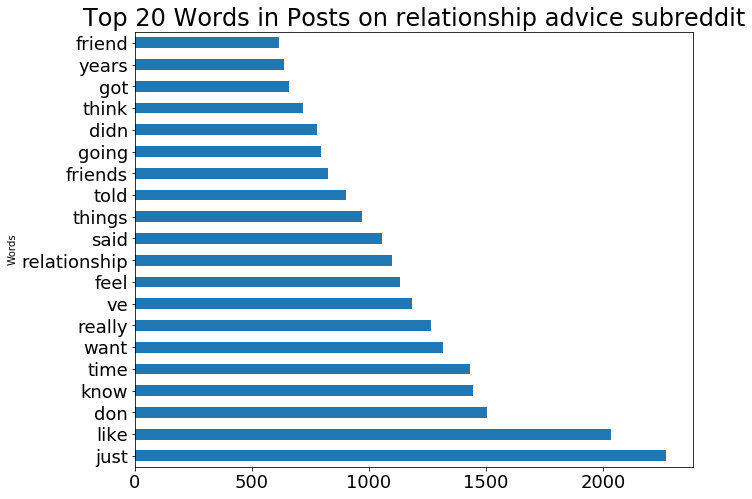

In [69]:
pop_words = pd.DataFrame(common_words, columns=['Words', 'count'])
plt.figure(figsize=(10,8))
pop_words.groupby('Words').sum()['count'].sort_values(ascending=False).plot(kind='barh', fontsize=18)
plt.title("Top 20 Words in Posts on relationship advice subreddit", fontsize=24);

In [70]:
%ls

README.md                         dating-advice-scrape.ipynb
Requirements.txt                  reddit-NLP.ipynb
Vader.ipynb                       relationship-advice-scrape.ipynb
datasets/


In [71]:
train = pd.read_csv('datasets/train.csv')

In [72]:
train.shape

(1893, 9)

In [73]:
train = pd.concat(objs=[more_relat, train], axis='rows', ignore_index=True)

/Users/rachelkoenig/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [74]:
train.shape

(2887, 11)

In [75]:
train['id'].value_counts().head()

caiftj    1
ca3ic9    1
c8bwck    1
c8i9wz    1
cai31d    1
Name: id, dtype: int64

In [76]:
# train.to_csv('datasets/more_train.csv')
# commented out so as to not save over my original when notebook is rerun.